<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/Gabor%20Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Gabor filter to generate texture features

**Task 1**: Apply Gabor filter to extract hidden image

**Task 2**: Generate different Gabor filters and apply to detect specified features of the image

**Task 3**: Observe effects of the changes in parameters of Gabor filter

### **Task 1:**


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread(
    'hidden_image.JPG'
)

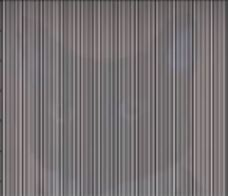

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

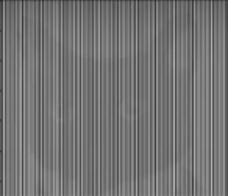

In [7]:
cv2_imshow(gray_image)

In [9]:
# How the gabor filter is oreinted
# theta = 0 => Vertical
# theta = pi/2 => Horizontal edges
theta = np.pi/2

In [16]:
# Gabor filter = combination of sine wave +
# gaussian curve (overriding the sine wave)
sigma = 5

In [17]:
# lambda = wavelength
lambda_val = np.pi/4

In [18]:
# offset for sine wave
psi = 0.8

In [19]:
kernel_size = 15
gamma = 0.1

In [20]:
kernel = cv2.getGaborKernel(
    (kernel_size, kernel_size),
    sigma,
    theta,
    lambda_val,
    gamma,
    psi)

In [24]:
np.max(kernel)

0.7894560697680153

In [25]:
np.min(kernel)

-0.8065608914600704

In [26]:
len(kernel)

15

In [31]:
filtered_img = cv2.filter2D(gray_image,cv2.CV_8UC3 , kernel)

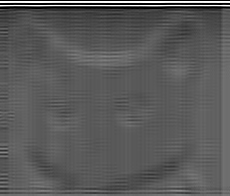

In [32]:
cv2_imshow(filtered_img)

In [60]:
def gaborFilter(image, ksize, sigma, theta, lambd, gamma, psi):
    kernel = cv2.getGaborKernel(
        (ksize, ksize),
        sigma,
        theta,
        lambd,
        gamma,
        psi
        )

    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    plt.figure(figsize=(10,6))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,3,2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Image after applying Gabor Filter')

    plt.subplot(1,3,3)
    plt.imshow(kernel, cmap='gray')
    plt.title('Kernel')

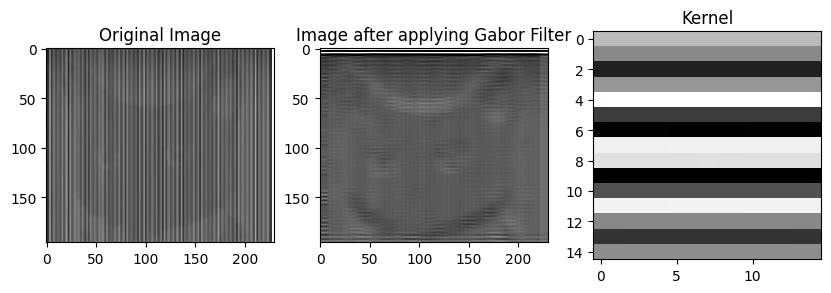

In [61]:
gaborFilter(gray_image, kernel_size, sigma, theta, lambda_val, gamma, psi)

### **Task 2:**

#### **Change the value of theta**

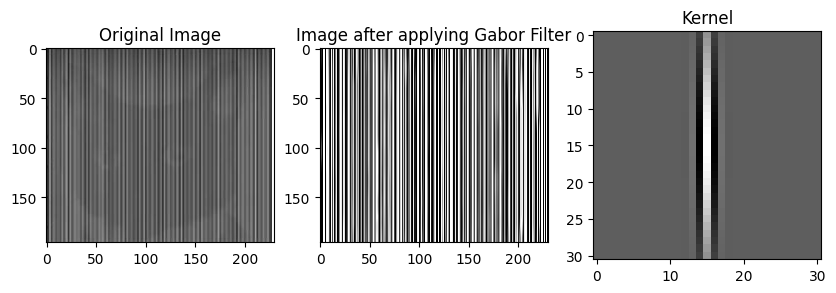

In [73]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=0, lambd=np.pi/8, gamma=0.1, psi=0)

Theta is 0 in the above case. So instead of getting rid of vertical lines, we amplified the effect

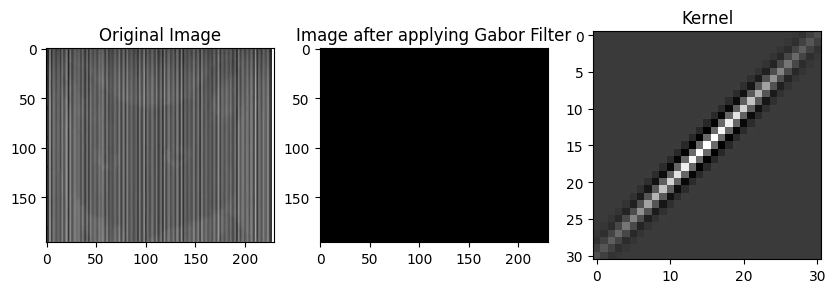

In [67]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/4, lambd=np.pi/8, gamma=0.1, psi=0)

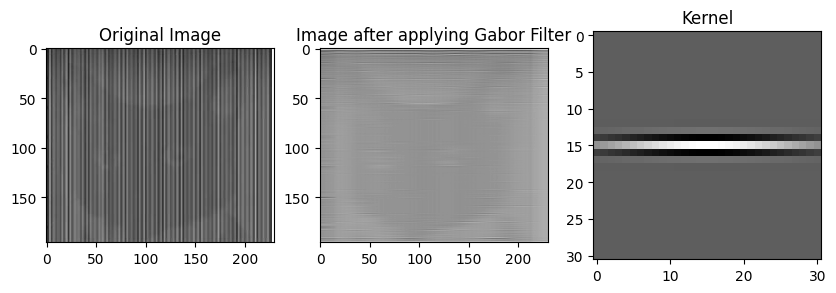

In [72]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

#### **Change the value of ksize**

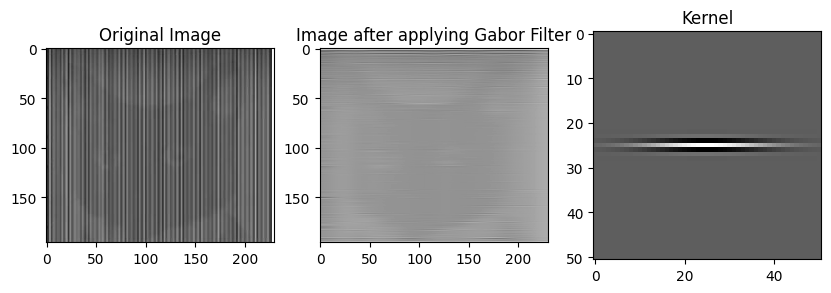

In [63]:
gaborFilter(gray_image, ksize=51, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

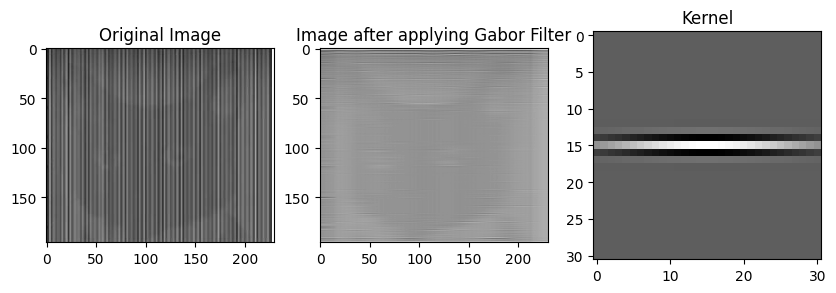

In [64]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

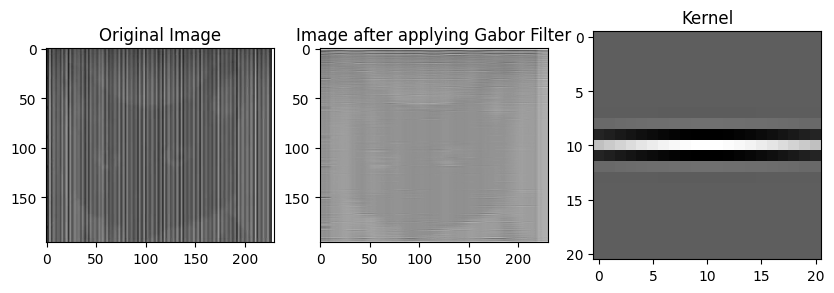

In [74]:
gaborFilter(gray_image, ksize=21, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

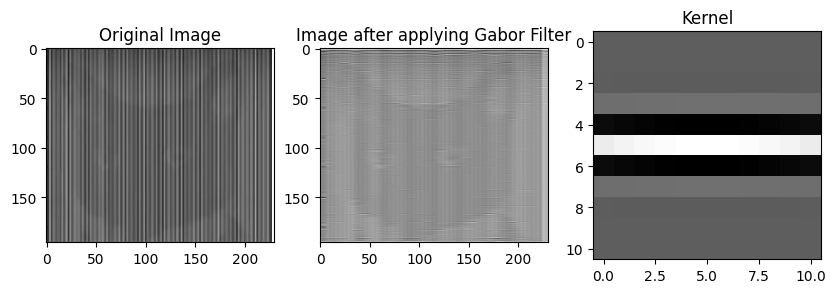

In [66]:
gaborFilter(gray_image, ksize=11, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

Final Image is black because we don't have any 45 degree edges

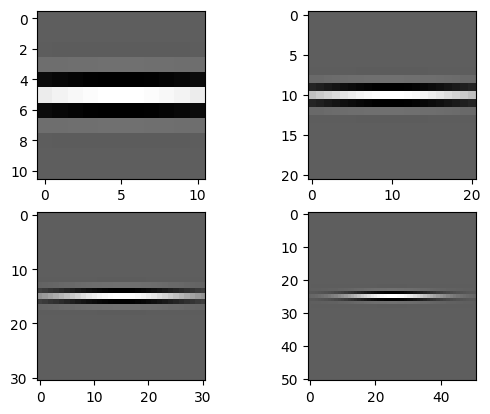

In [80]:
sigma_values = [11, 21, 31, 51]
for i in range(len(sigma_values)):
    kernel = cv2.getGaborKernel(ksize=(sigma_values[i],sigma_values[i]), sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)
    plt.subplot(2,2,i+1)
    plt.imshow(kernel, cmap='gray')


#### **Increasing the value of sigma**

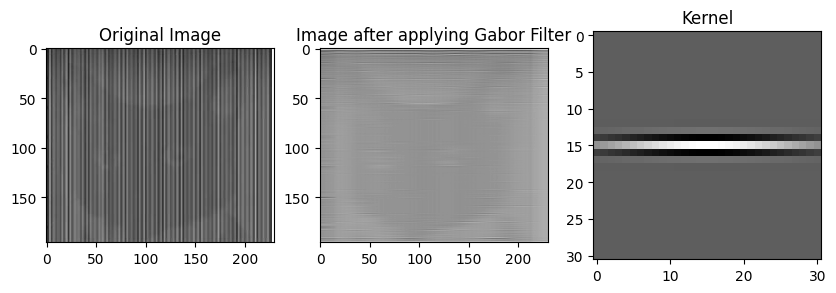

In [68]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

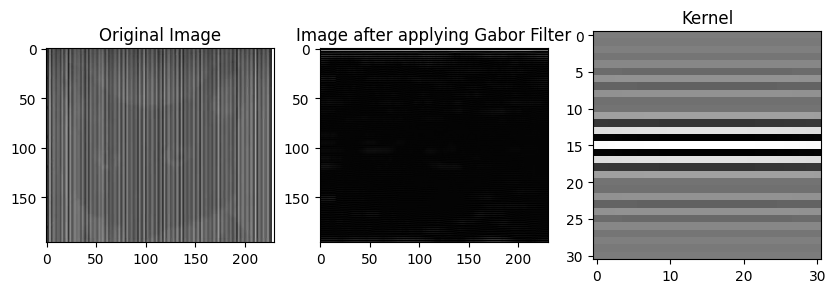

In [69]:
gaborFilter(gray_image, ksize=31, sigma=5, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

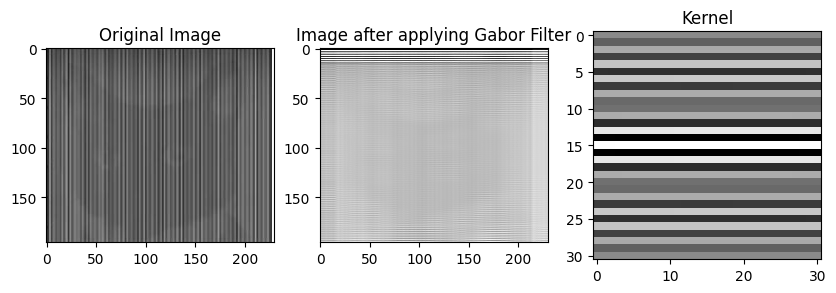

In [70]:
gaborFilter(gray_image, ksize=31, sigma=10, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

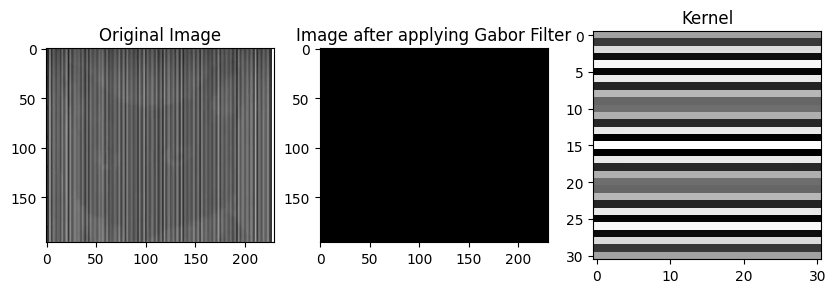

In [71]:
gaborFilter(gray_image, ksize=31, sigma=30, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

#### **Change the value of Lambda**

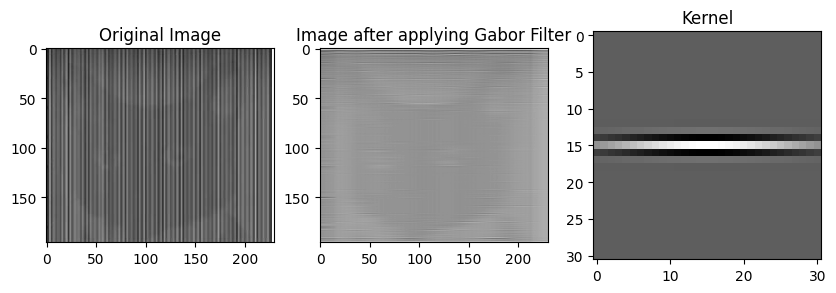

In [94]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.1, psi=0)

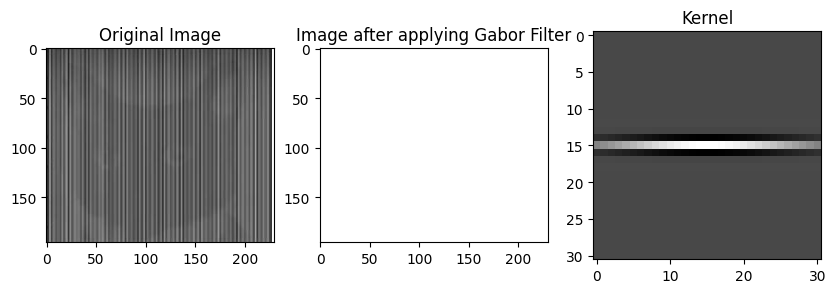

In [97]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/2, gamma=0.1, psi=0)

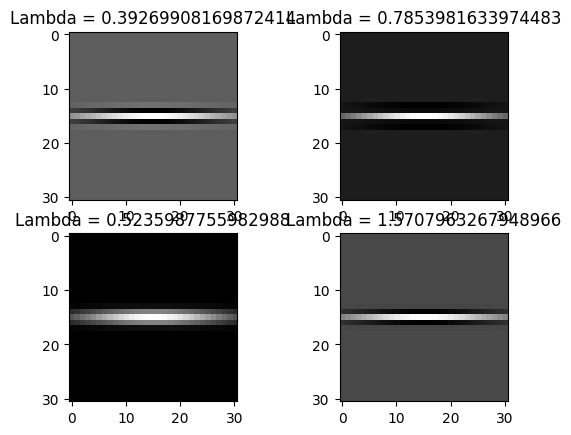

In [96]:
lambda_values = [np.pi/8, np.pi/4, np.pi/6, np.pi/2]
for i in range(len(lambda_values)):
    kernel = cv2.getGaborKernel(ksize=(31,31), sigma=1, theta=np.pi/2, lambd=lambda_values[i], gamma=0.1, psi=0)
    plt.subplot(2,2,i+1)
    plt.title(f"Lambda = {lambda_values[i]}")
    plt.imshow(kernel, cmap='gray')


#### **Changing Gamma**


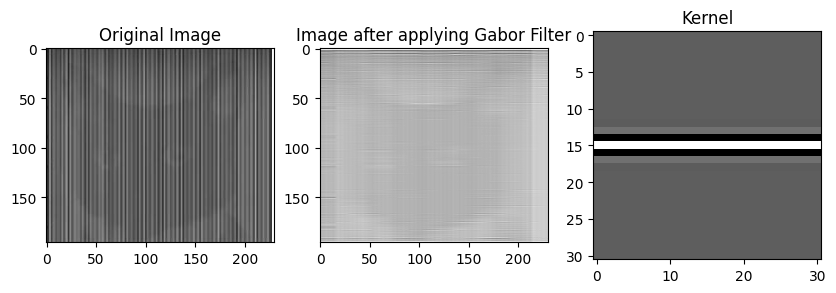

In [84]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0, psi=0)

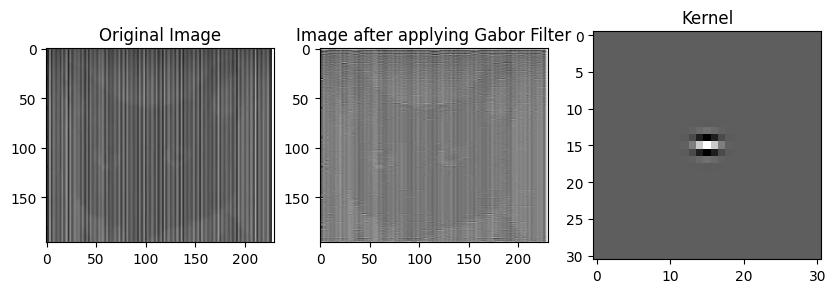

In [85]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.8, psi=0)

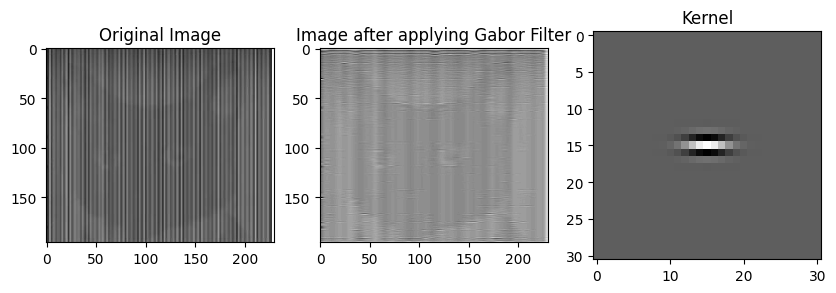

In [87]:
gaborFilter(gray_image, ksize=31, sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=0.5, psi=0)

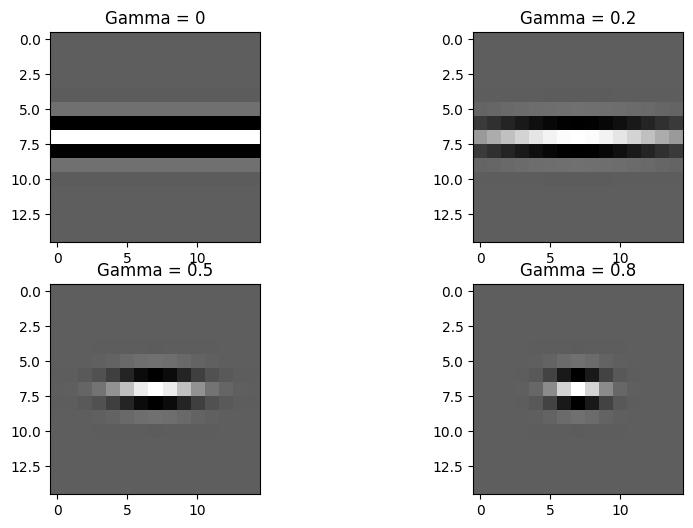

In [90]:
gamma = [0, 0.2, 0.5, 0.8]
plt.figure(figsize=(10,6))
for i in range(len(lambda_values)):
    kernel = cv2.getGaborKernel(ksize=(15,15), sigma=1, theta=np.pi/2, lambd=np.pi/8, gamma=gamma[i], psi=0)
    plt.subplot(2,2,i+1)
    plt.title(f"Gamma = {gamma[i]}")
    plt.imshow(kernel, cmap='gray')


### **Task 3:**


In [99]:
from skimage.data import brick

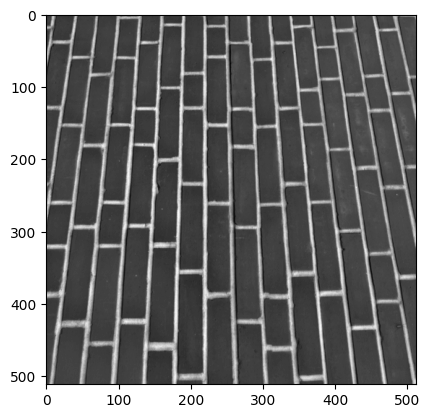

In [102]:
plt.imshow(brick(), cmap='gray')

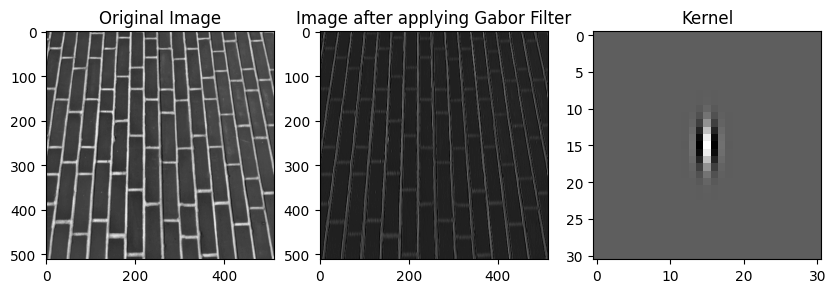

In [106]:
gaborFilter(brick(), ksize=31, sigma=1, theta=0, lambd=np.pi/8, gamma=0.5, psi=0)

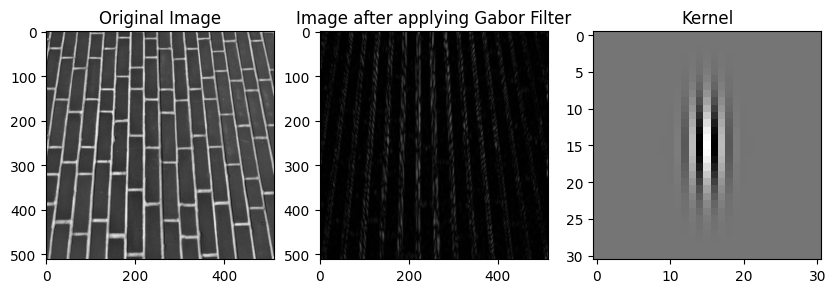

In [107]:
gaborFilter(brick(), ksize=31, sigma=2, theta=0, lambd=np.pi/8, gamma=0.5, psi=0)

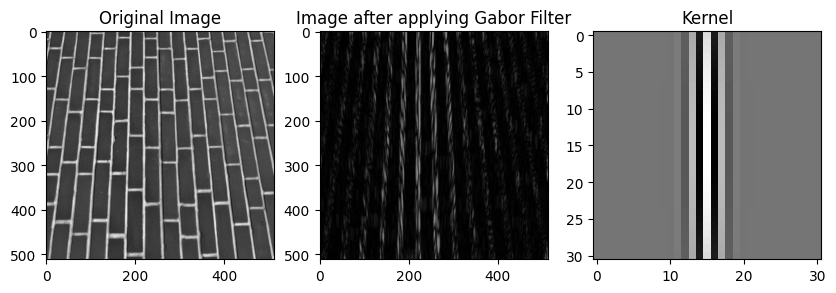

In [108]:
gaborFilter(brick(), ksize=31, sigma=2, theta=0, lambd=np.pi/8, gamma=0.1, psi=0)

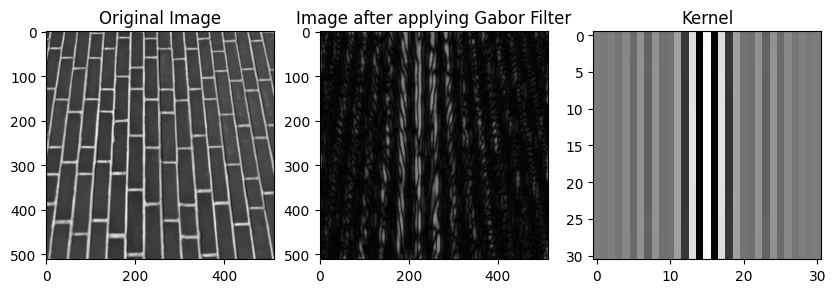

In [112]:
gaborFilter(brick(), ksize=31, sigma=5, theta=0, lambd=np.pi/8, gamma=0.1, psi=0)

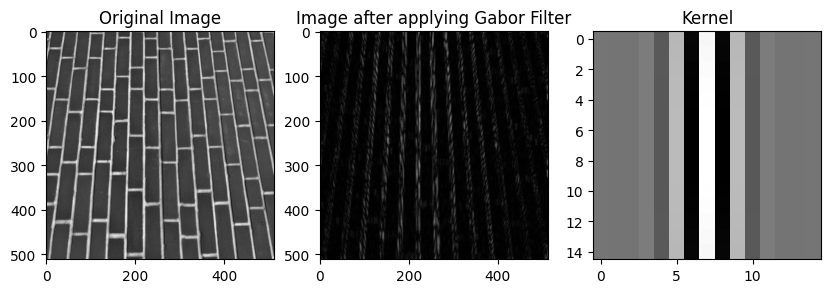

In [110]:
gaborFilter(brick(), ksize=15, sigma=2, theta=0, lambd=np.pi/8, gamma=0.1, psi=0)

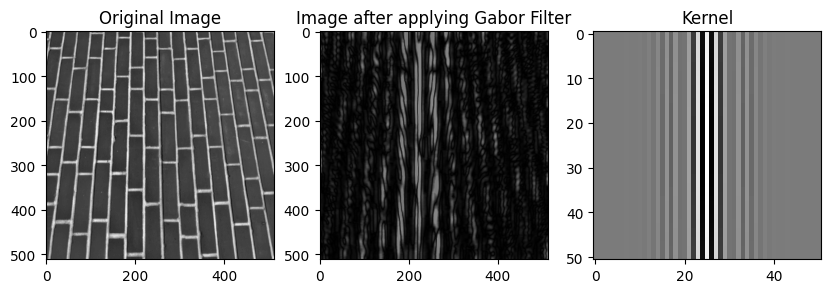

In [113]:
gaborFilter(brick(), ksize=51, sigma=5, theta=0, lambd=np.pi/8, gamma=0.1, psi=0)

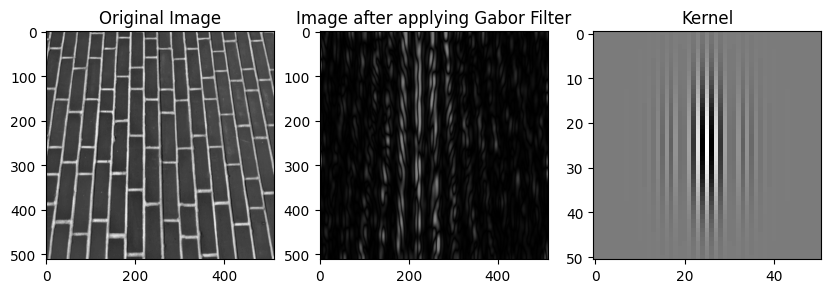

In [114]:
gaborFilter(brick(), ksize=51, sigma=5, theta=0, lambd=np.pi/8, gamma=0.5, psi=0)

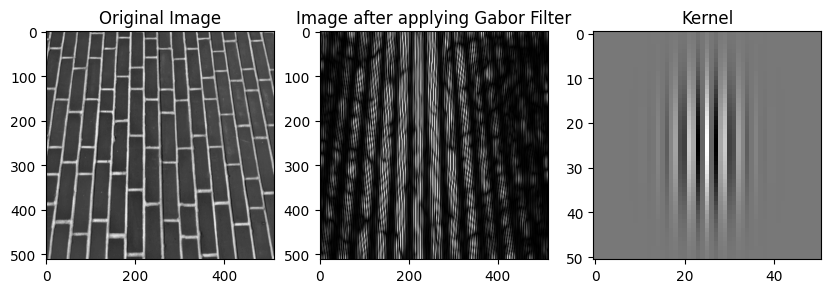

In [115]:
gaborFilter(brick(), ksize=51, sigma=5, theta=0, lambd=np.pi/4, gamma=0.5, psi=0)

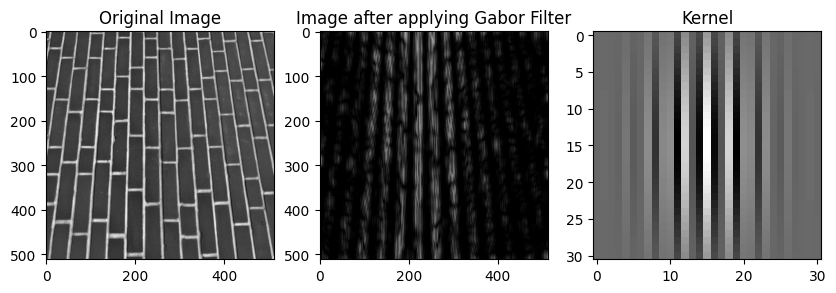

In [117]:
gaborFilter(brick(), ksize=31, sigma=5, theta=0, lambd=np.pi/2, gamma=0.5, psi=0)

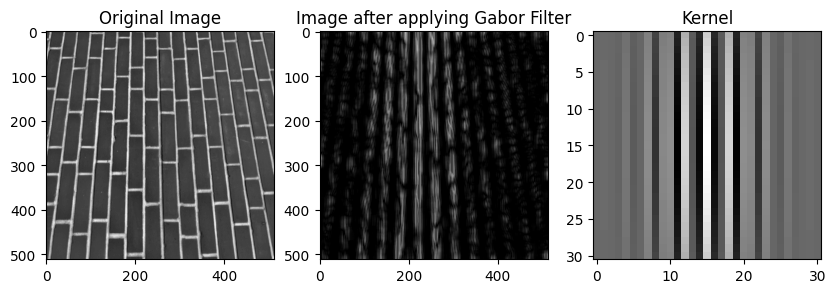

In [118]:
gaborFilter(brick(), ksize=31, sigma=5, theta=0, lambd=np.pi/2, gamma=0.3, psi=0)

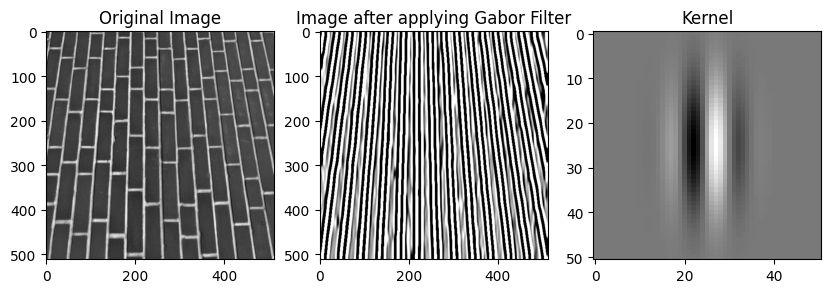

In [120]:
gaborFilter(brick(), ksize=51, sigma=5, theta=0, lambd=np.pi/6, gamma=0.5, psi=5)

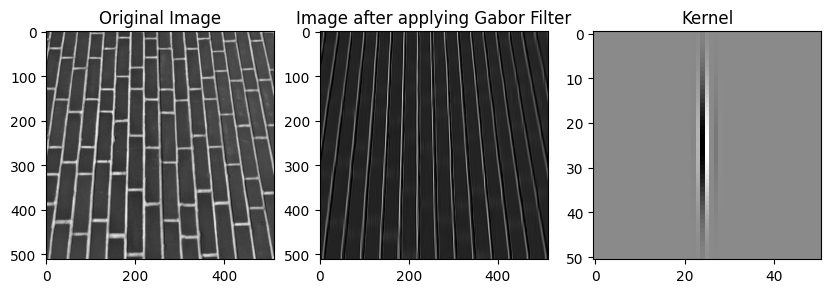

In [121]:
gaborFilter(brick(), ksize=51, sigma=1, theta=0, lambd=np.pi/8, gamma=0.1, psi=5)

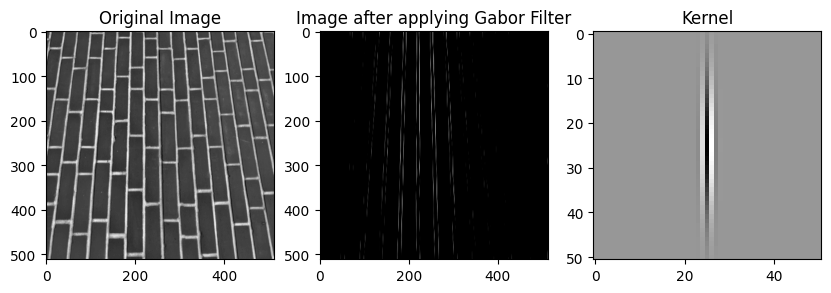

In [122]:
gaborFilter(brick(), ksize=51, sigma=1, theta=0, lambd=np.pi/8, gamma=0.1, psi=10)

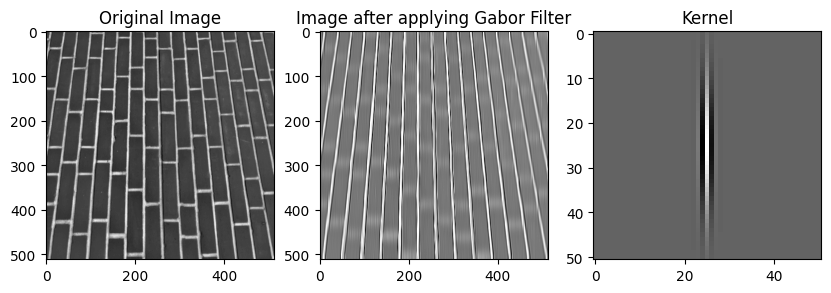

In [125]:
gaborFilter(brick(), ksize=51, sigma=1, theta=0, lambd=np.pi/8, gamma=0.1, psi=6)

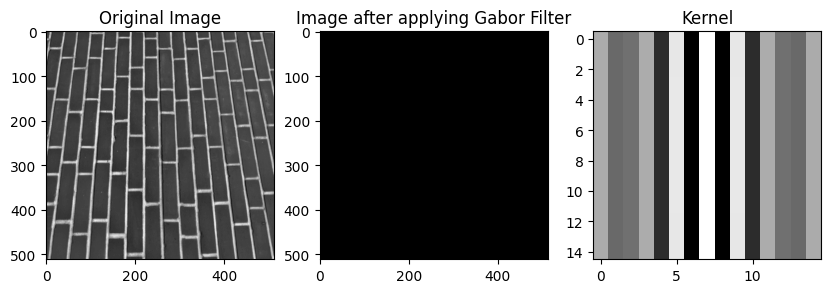

In [127]:
gaborFilter(brick(), ksize=51, sigma=1, theta=0, lambd=np.pi/8, gamma=0.1, psi=5)

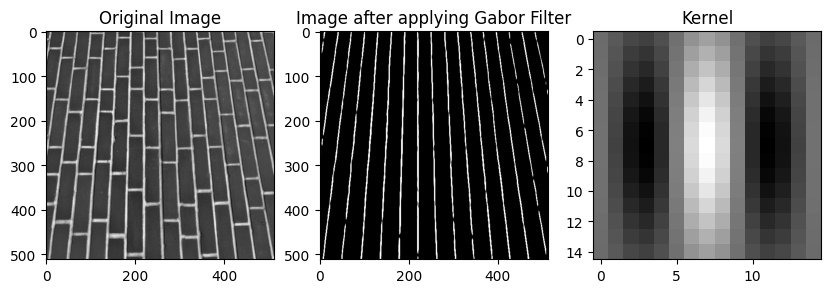

In [128]:
gaborFilter(brick(), ksize=15, sigma=5, theta=0, lambd=0.9, gamma=1, psi=0)

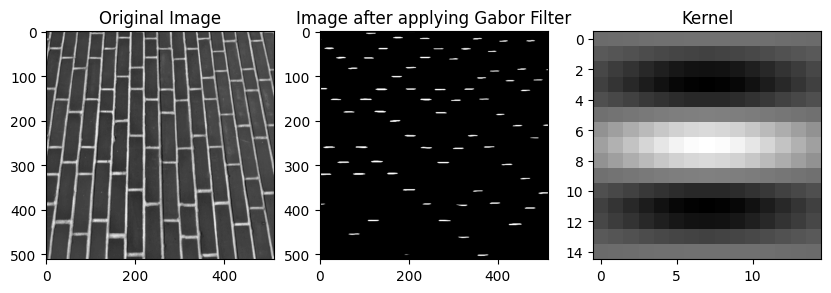

In [130]:
gaborFilter(brick(), ksize=15, sigma=5, theta=np.pi/2, lambd=0.9, gamma=1, psi=0)

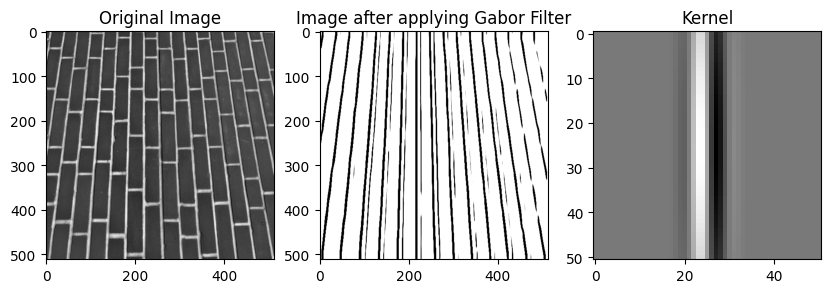

In [134]:
gaborFilter(brick(), ksize=51, sigma=3, theta=0, lambd=0.9, gamma=0.1, psi=5)

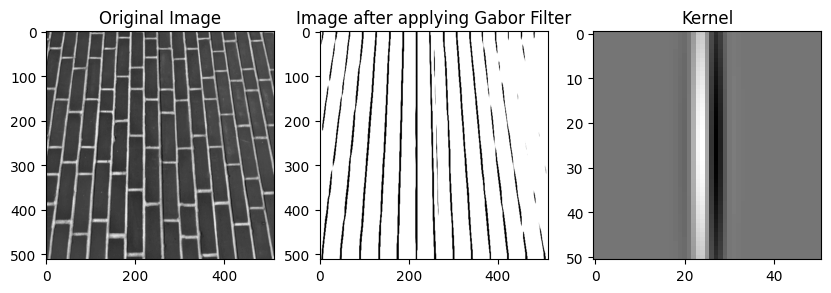

In [137]:
gaborFilter(brick(), ksize=51, sigma=2.5, theta=0, lambd=0.9, gamma=0.1, psi=5)

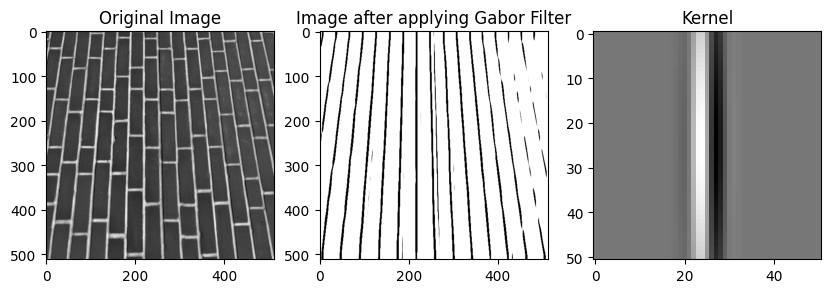

In [138]:
gaborFilter(brick(), ksize=51, sigma=2.7, theta=0, lambd=0.9, gamma=0.1, psi=5)

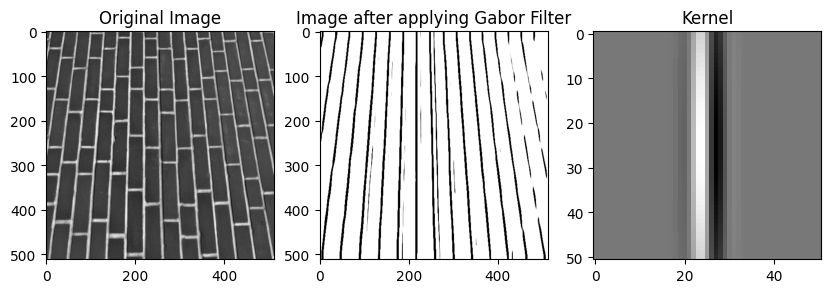

In [141]:
gaborFilter(brick(), ksize=51, sigma=2.8, theta=0, lambd=0.9, gamma=0.1, psi=5)

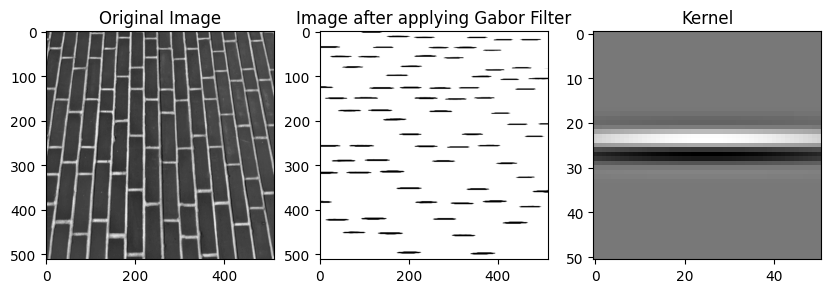

In [142]:
gaborFilter(brick(), ksize=51, sigma=2.8, theta=np.pi/2, lambd=0.9, gamma=0.1, psi=5)

## Conclusion:

1. Gabor filter of specific parameters is used to eliminate vertical lines to extract hidden part of the image.

2. Effect of change of values of several parameters are analysed to observe the characteristics of Gabor filter.

3. By changing the value of theta, the orientation of the filter can be changed to highlight edges in the direction of orientation

4. By increasing the sigma value, the number of peaks of sinosoidal part of the Gabor filter increased which shows several stripes of large intensity value in the filter which can be used to identify several stripes of the given image.

5. If Gamma value is changed from 0 to 0.8, the width of the filter narrows down in horizontal direction. Thinner vertical lines are extracted when the filter is narrowed.

6. We applied the gabor filter on the specific image -- Brick. Two filters of specific combination are used to highlight only horizontal and only vertical edges of the given image.

**2 combinations that worked:**

1.  ksize=15, sigma=5, theta=0, lambd=0.9, gamma=1, psi=0

2. ksize=51, sigma=2.8, theta=np.pi/2, lambd=0.9, gamma=0.1, psi=5

